In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./dataset-0510"]).decode("utf8"))

fields.pdf
submit_test.csv
test.csv
train.csv



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
train_data = pd.read_csv('./dataset-0510/train.csv')

In [6]:
def show_missing(houseprice):
    missing = houseprice.columns[houseprice.isnull().any()].tolist()
    return missing

def cat_exploration(houseprice, column):
    print(houseprice[column].value_counts())

def cat_imputation(houseprice, column, value):
    houseprice.loc[houseprice[column].isnull(), column] = value

In [7]:
train_data
# feature 235 rows data number is 6k

building_id  building_material  city  txn_dt  total_floor  \
0      e3mMIMR3JJqCaXz1                  8    21   18674            4   
1      LgwzgklNvy4QCtq5                  8     7   18800            5   
2      ucIR2NLLsC3T650L                  8     7   19289            4   
3      jre1pJhcQj91Kdky                  8    21   20385           24   
4      rQpYpY9nRG7X5mmr                  1    21   20657            2   
5      HmW2MkrwafmceWAH                  8    21   18394            5   
6      ITYyim3zx6DQyCoF                  8     7   20474           15   
7      KFrxqaWZaLynrOae                  8    12   18185            8   
8      ZiK0gY7A0BvwZ8OV                  8    21   18794            5   
9      QnytA7FbgaVxIDuP                  8     7   19927           10   
10     jcbuA8q3KPH9SzpS                  1     7   18333            2   
11     KHo10f3pvTcVL7Dc                  8    21   18184            5   
12     PUk1MAN1Q0sfWRh1                  8     7   18766            7   
13     EqWJpHmkXPyfHkB8                  1     7   19674            3   
14     ihrMWGM8Nq99Uvu6                  8     7   19824           13   
15     L4xYv2DjCXWSaNWA                  8    17   19011            4   
16     jRhwzoVMFLFzxAX1                  8     7   19545            5   
17     pMWMdm8EYWyraHnS                  8     7   19765            7   
18     FZMjOFuDmYpDYzH4                  8     7   18792           17   
19     SOAzVOnYT22Xb7qn                  8     7   19528            5   
20     ISuDDnGeZIyKtuA2                  8     7   20039            5   
21     YkI8LVcDts7Na5gN                  1    10   19114            2   
22     CmxhhQnZUAu0DXpM                  8    21   20566            3   
23     CrIEmQgmBE2ahJtJ                  8     7   19706            5   
24     HgJIj8X0t1frAKVd                  8    12   18835           12   
25     ohfH2g5ymt8QilFL                  8     7   20126           10   
26     axEd1kED96HP3y0e                  8    13   18641           12   
27     zGOKJ2gvlPF58MF8                  1    10   19811            4   
28     fiT7b1h7csZC00CJ                  8    21   18794            4   
29     DqZkt5YYXwzIDHgk                  8     7   19809           10   
...                 ...                ...   ...     ...          ...   
59970  XtVZcz3tOs91LNnu                  8    21   19368           12   
59971  mISY1Um1KfIU1Uis                  8    14   20605            7   
59972  wUYHmqUlJBNKPqOO                  8     7   19963            4   
59973  pIeHm5uPrR5RFEVK                  1     7   20257            2   
59974  F9uqL6mJFKgKgNn6                  8    13   19314            5   
59975  WKRqiM2Zq6xRe8Xc                  8     7   20000            3   
59976  pEKcGQMo5iBW8QHt                  8    12   20136            4   
59977  Iu3iAXmVRMSSgkgl                  8     7   20640            5   
59978  WCELFEuD2QlUDKNU                  8    10   20306           12   
59979  T9cWRUb95dAzWIRh                  8    14   20566            4   
59980  ShskTRzyym3IzIVi                  8     7   20199            5   
59981  BgNqHDLS3emF1etR                  8     7   19671            3   
59982  fN0V50s76ricENlj                  8     7   19290            7   
59983  F3LLRdYyFaI4874d                  8     7   18229           16   
59984  JErZuHbA6oEXrvTh                  8    21   20647            5   
59985  yPUgYaLUzr1JRqLE                  8    12   20384            4   
59986  ri3C7V5SoO4PBo05                  8    14   19772            8   
59987  QZSvDBvS2WqfYPDl                  8    13   19412            4   
59988  QWy9TWRaVt83vRgI                  8    14   19692            4   
59989  JjHLg8Nh6k4Tbdci                  8    10   19348            3   
59990  POWNxN6h8QoQ9MqU                  8    13   20081            7   
59991  xhfuBhNakAW9NqHF                  1     7   19908            5   
59992  AygaZ73jxpjxLr9k                  8    21   18194            7 

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(37), int64(197), object(1)
memory usage: 107.6+ MB


In [9]:
train_data['total_price'].describe()

count    6.000000e+04
mean     1.293727e+07
std      5.522463e+07
min      2.261495e+05
25%      2.433114e+06
50%      5.240482e+06
75%      1.123932e+07
max      5.088279e+09
Name: total_price, dtype: float64

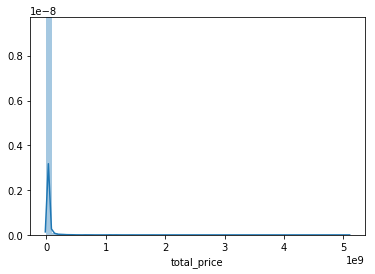

In [10]:
sns.distplot(train_data['total_price'])

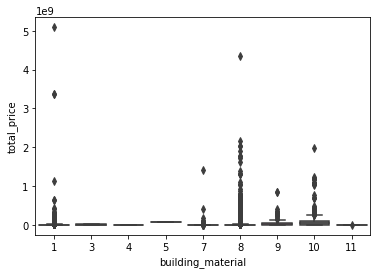

In [11]:
var = 'building_material'
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

In [12]:
train_data['parking_way'].describe()


count    60000.000000
mean         1.585700
std          0.778952
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: parking_way, dtype: float64

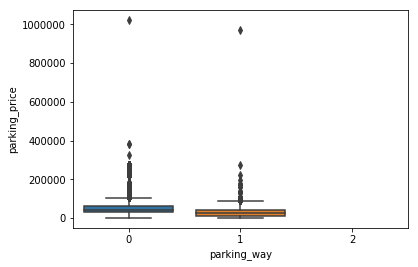

In [13]:
var = 'parking_way'
data = pd.concat([train_data['parking_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="parking_price", data=data)


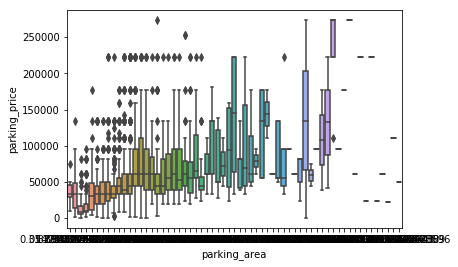

In [14]:
var = 'parking_area'
data = pd.concat([train_data['parking_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="parking_price", data=data)

## Look like parking area and price in direct proportion. 

## It seems that a large area does not absolutely affect the price.

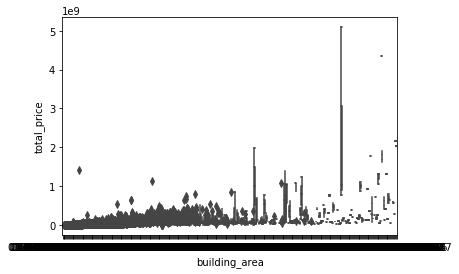

In [15]:
var = 'building_area'
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

## As same as building area

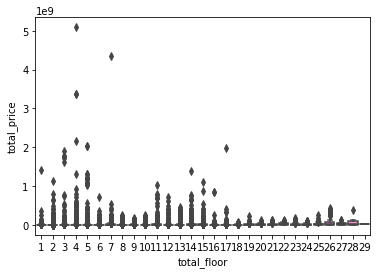

In [16]:
var = 'total_floor'
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

count    58858.000000
mean       674.840175
std        140.653083
min        411.000000
25%        583.000000
50%        642.000000
75%        729.000000
max       1851.000000
Name: village_income_median, dtype: float64


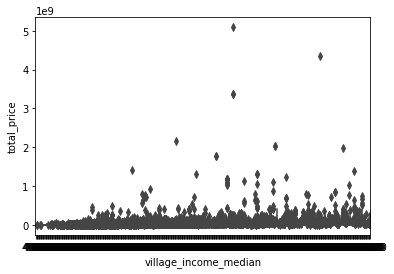

In [17]:
var = 'village_income_median'
print(train_data[var].describe())
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

## Look like village income median and price in direct proportion. 

count     60000.000000
mean     231270.304117
std      128148.636175
min        5478.000000
25%      139259.000000
50%      201309.000000
75%      302089.000000
max      551480.000000
Name: town_population, dtype: float64


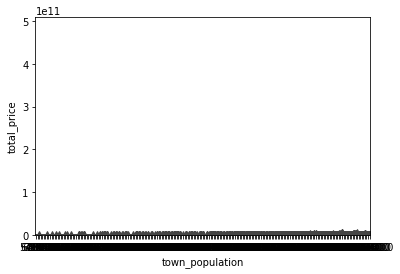

In [18]:
var = 'town_population'
print(train_data[var].describe())
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

count     60000.000000
mean     231270.304117
std      128148.636175
min        5478.000000
25%      139259.000000
50%      201309.000000
75%      302089.000000
max      551480.000000
Name: town_population, dtype: float64


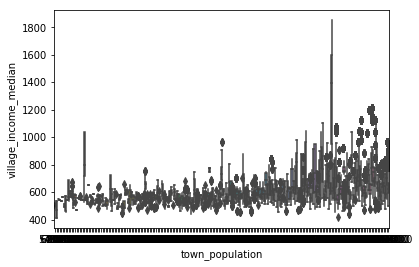

In [19]:
var = 'town_population'
print(train_data[var].describe())
data = pd.concat([train_data['village_income_median'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="village_income_median", data=data)
#fig.axis(ymin=1411, ymax=5.088279e+11);

count    60000.000000
mean     11293.218933
std       9449.202082
min         49.000000
25%       2798.000000
50%       8054.000000
75%      20532.000000
max      38956.000000
Name: town_population_density, dtype: float64


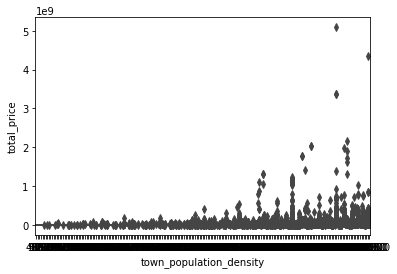

In [20]:
var = 'town_population_density'
print(train_data[var].describe())
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

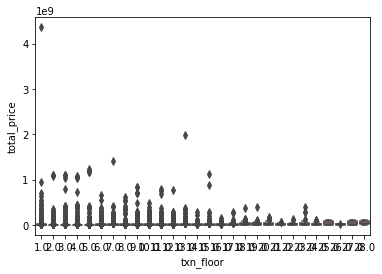

In [21]:
var = 'txn_floor'
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

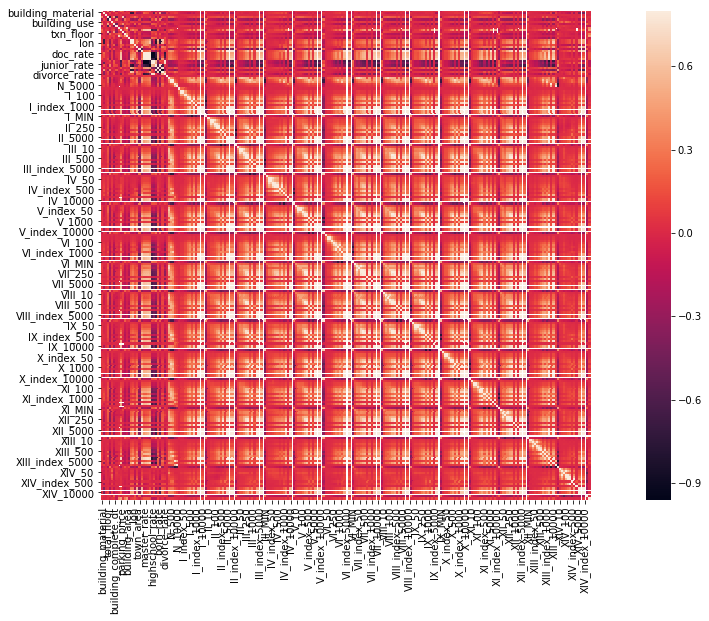

In [22]:
# corr
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

# Constructing model

In [96]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
train_data = pd.read_csv('./dataset-0510/train.csv')

In [97]:
train_data = train_data.drop(['building_id', 'parking_area', 'parking_price'], axis=1)

In [98]:
count = train_data.isnull().sum()
count

building_material              0
city                           0
txn_dt                         0
total_floor                    0
building_type                  0
building_use                   0
building_complete_dt           0
parking_way                    0
txn_floor                  15902
land_area                      0
building_area                  0
town                           0
lat                            0
lon                            0
village_income_median       1142
town_population                0
town_area                      0
town_population_density        0
doc_rate                       0
master_rate                    0
bachelor_rate                  0
jobschool_rate                 0
highschool_rate                0
junior_rate                    0
elementary_rate                0
born_rate                      0
death_rate                     0
marriage_rate                  0
divorce_rate                   0
village                        0
          

In [99]:
corrmat = train_data.corr()
#f, ax = plt.subplots(figsize=(20, 9))
#sns.heatmap(corrmat, annot= True)

In [100]:
print("Find most important features relative to target")
corrmat.sort_values(['total_price'], ascending=False, inplace=True)
corr_price = corrmat.total_price
print(corr_price)

Find most important features relative to target
total_price              1.000000
building_area            0.459167
land_area                0.313409
master_rate              0.168603
bachelor_rate            0.168585
doc_rate                 0.165599
XIII_5000                0.161861
jobschool_rate           0.150532
village_income_median    0.145541
VII_5000                 0.140251
V_5000                   0.136286
VII_1000                 0.135433
V_1000                   0.135189
XIII_10000               0.134800
IX_5000                  0.133290
VII_10000                0.133018
XI_10000                 0.131184
V_500                    0.130854
VI_10000                 0.130448
IX_1000                  0.129597
IX_10000                 0.129468
V_10000                  0.128324
VII_500                  0.127891
VIII_5000                0.126393
VIII_10000               0.124815
III_10000                0.124746
VI_5000                  0.124249
X_10000                  0.123970


In [115]:
#train_data= train_data.drop([
#    'I_index_5000', 'I_index_10000', 'II_index_5000', 'II_index_10000', 'III_index_5000',
#    'II_index_10000', 'III_index_5000', 'IV_index_10000', 'V_index_5000', 'VI_index_5000',
#    'III_index_10000'
#], axis=1)
def drop_low_corr(data, threshold=0.1):
    corrmat = data.corr().total_price
    high_corr_cols = []
    i = 0
    for value in corr_price:
        if value > 0.1 :
            high_corr_cols.append(data.columns[i])
        i+=1
   
    
        
    return high_corr_cols

high_corr_cols = drop_low_corr(train_data)
print(high_corr_cols)
train_data2 = train_data[high_corr_cols]
train_data2.shape


['building_material', 'city', 'txn_dt', 'total_floor', 'building_type', 'building_use', 'building_complete_dt', 'parking_way', 'txn_floor', 'land_area', 'building_area', 'town', 'lat', 'lon', 'village_income_median', 'town_population', 'town_area', 'town_population_density', 'doc_rate', 'master_rate', 'bachelor_rate', 'jobschool_rate', 'highschool_rate', 'junior_rate', 'elementary_rate', 'born_rate', 'death_rate', 'marriage_rate', 'divorce_rate', 'village', 'N_50', 'N_500', 'N_1000', 'N_5000', 'N_10000', 'I_10', 'I_50', 'I_index_50', 'I_100', 'I_250', 'I_500', 'I_index_500', 'I_1000', 'I_index_1000', 'I_5000', 'I_index_5000', 'I_10000', 'I_index_10000']


(60000, 48)

In [111]:
train_data2 = train_data2.drop(['txn_floor', 'village_income_median'], axis=1)

txn_floor = train_data['txn_floor'].fillna(5.389269)
village_income_median = train_data['village_income_median'].fillna(674.840175)
x = pd.concat( [train_data2, txn_floor, village_income_median] ,axis=1)
x

building_material  city  txn_dt  total_floor  building_type  \
0                      8    21   18674            4              3   
1                      8     7   18800            5              1   
2                      8     7   19289            4              1   
3                      8    21   20385           24              0   
4                      1    21   20657            2              4   
5                      8    21   18394            5              1   
6                      8     7   20474           15              0   
7                      8    12   18185            8              3   
8                      8    21   18794            5              1   
9                      8     7   19927           10              3   
10                     1     7   18333            2              4   
11                     8    21   18184            5              4   
12                     8     7   18766            7              3   
13                     1     7   19674            3              1   
14                     8     7   19824           13              0   
15                     8    17   19011            4              4   
16                     8     7   19545            5              1   
17                     8     7   19765            7              3   
18                     8     7   18792           17              0   
19                     8     7   19528            5              1   
20                     8     7   20039            5              1   
21                     1    10   19114            2              4   
22                     8    21   20566            3              4   
23                     8     7   19706            5              1   
24                     8    12   18835           12              0   
25                     8     7   20126           10              3   
26                     8    13   18641           12              0   
27                     1    10   19811            4              1   
28                     8    21   18794            4              4   
29                     8     7   19809           10              3   
...                  ...   ...     ...          ...            ...   
59970                  8    21   19368           12              0   
59971                  8    14   20605            7              3   
59972                  8     7   19963            4              1   
59973                  1     7   20257            2              4   
59974                  8    13   19314            5              1   
59975                  8     7   20000            3              4   
59976                  8    12   20136            4              4   
59977                  8     7   20640            5              1   
59978                  8    10   20306           12              2   
59979                  8    14   20566            4              4   
59980                  8     7   20199            5              1   
59981                  8     7   19671            3              4   
59982                  8     7   19290            7              3   
59983                  8     7   18229           16              0   
59984                  8    21   20647            5              1   
59985                  8    12   20384            4              4   
59986                  8    14   19772            8              3   
59987                  8    13   19412            4              1   
59988                  8    14   19692            4              4   
59989                  8    10   19348            3              4   
59990                  8    13   20081            7              3   
59991                  1     7   19908            5              1   
59992                  8    21   18194            7              3   
59993                  8    13   18715            4              1   
59994                  1     7   18359            4              1   
59995            

## Normalized

In [112]:
y = train_data['total_price'].values
standardScaler = preprocessing.StandardScaler()

x_scaled = standardScaler.fit_transform(x)
y_scaled = standardScaler.fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

/home/islab/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/islab/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [113]:
clfs = {
        'RandomForestRegressor':RandomForestRegressor(n_estimators=100),
        'LinearRegressor': linear_model.LinearRegression(),
        'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, max_depth=4)
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

/home/islab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor cost:-72.10315119832099
LinearRegressor cost:-0.0058929942807366496


/home/islab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor cost:-86.9785533290522


In [116]:
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#print(y_pred)
print(" cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )

 cost:-0.0058929942807366496


In [117]:
origin_y_pred = standardScaler.inverse_transform(y_pred)
origin_y_pred

array([[ 5186925.76523345],
       [ 3393190.811035  ],
       [22795868.09215479],
       ...,
       [14196615.81591213],
       [17660417.74810322],
       [ 7394595.66301383]])

In [118]:
y_pred

array([[-0.14034335],
       [-0.17282433],
       [ 0.17851961],
       ...,
       [ 0.02280424],
       [ 0.08552681],
       [-0.10036683]])

In [119]:
y_test

array([[-0.10748963],
       [-0.1636379 ],
       [-0.07065718],
       ...,
       [-0.1244942 ],
       [-0.00326012],
       [-0.16930403]])

In [120]:
sum(abs(y_pred - y_test))/len(y_pred)

array([0.17647972])

# Test data

In [143]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 之前训练的模型
rfr = clf

In [144]:
data_test = pd.read_csv('./dataset-0510/test.csv')
data_test[high_corr_cols].isnull().sum()

building_material             0
city                          0
txn_dt                        0
total_floor                   0
building_type                 0
building_use                  0
building_complete_dt          0
parking_way                   0
txn_floor                  2639
land_area                     0
building_area                 0
town                          0
lat                           0
lon                           0
village_income_median       184
town_population               0
town_area                     0
town_population_density       0
doc_rate                      0
master_rate                   0
bachelor_rate                 0
jobschool_rate                0
highschool_rate               0
junior_rate                   0
elementary_rate               0
born_rate                     0
death_rate                    0
marriage_rate                 0
divorce_rate                  0
village                       0
N_50                          0
N_500   

In [145]:
data_test['txn_floor'].describe()

count    7361.000000
mean        5.421682
std         3.954859
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        27.000000
Name: txn_floor, dtype: float64

In [146]:
data_test['village_income_median'].describe()

count    9816.000000
mean      673.334760
std       139.364209
min       442.000000
25%       582.000000
50%       641.000000
75%       728.000000
max      1851.000000
Name: village_income_median, dtype: float64

In [150]:
txn_floor_test = data_test['txn_floor'].fillna(5.421682)
village_income_median_test = data_test['village_income_median'].fillna(673.334760)

data_test = data_test[high_corr_cols]
data_test2 = data_test.drop(['txn_floor', 'village_income_median'], axis=1)

data_test_x = pd.concat( [data_test2, txn_floor_test, village_income_median_test] ,axis=1)
data_test_x.isnull().sum()



building_material          0
city                       0
txn_dt                     0
total_floor                0
building_type              0
building_use               0
building_complete_dt       0
parking_way                0
land_area                  0
building_area              0
town                       0
lat                        0
lon                        0
town_population            0
town_area                  0
town_population_density    0
doc_rate                   0
master_rate                0
bachelor_rate              0
jobschool_rate             0
highschool_rate            0
junior_rate                0
elementary_rate            0
born_rate                  0
death_rate                 0
marriage_rate              0
divorce_rate               0
village                    0
N_50                       0
N_500                      0
N_1000                     0
N_5000                     0
N_10000                    0
I_10                       0
I_50          

In [151]:
x = data_test_x.values
y_test_pred = rfr.predict(x)

In [152]:
origin_y_test_pred = standardScaler.inverse_transform(y_pred)
print(origin_y_test_pred)

[[ 5186925.76523345]
 [ 3393190.811035  ]
 [22795868.09215479]
 ...
 [14196615.81591213]
 [17660417.74810322]
 [ 7394595.66301383]]


#  Prepare to submit

In [153]:
prediction = pd.DataFrame(y_test_pred, columns=['total_price'])
x_submit = pd.read_csv('./dataset-0510/submit_test.csv')
result = pd.concat([x_submit['building_id'], prediction], axis=1)
result

building_id  total_price
0     X5gsdTWGS3W7JJQB  1762.844413
1     BTshNOJyKHnT2YIT  2215.902773
2     dhdymr0lV8N5kZOT  4356.265536
3     VEwyGGMcD56w5BOc  4074.793114
4     wmUeMoJZfsqaSX9b  1147.866694
5     EtBjGAHmHCe9t7TZ  1835.061358
6     hPNH34vmaZtvBtqc  5918.073318
7     wXjeI38bYDMJJwZC  3929.502324
8     fxZSGX6aPAFKU8W4  1080.173152
9     ewr0Fx6ign87OwaV  6219.796522
10    gHKurnEP4AowzsLg  3252.381785
11    PmLfTgY2FElLrTl0  7649.902633
12    eM2NppIOwzW0o8iy  3184.619380
13    dxxwNun97NH4WTrZ  2493.815252
14    jykBfhh3vdeFUi3H  1488.760416
15    NlXbvdFfmJZf3L18  3677.368937
16    D7jaFWHCzSqLBwdt  1753.236876
17    L10dBBdqGmemweSl  3175.946600
18    OgB0AdiPKlElakKN  5067.206040
19    StiWNN1GQrpPBOYt  2483.897923
20    a016eMAVQKnfwMnt  4406.704375
21    gsCFcQHnOH3AKMcZ  7372.190800
22    IbNsDXfsPwSuFpow  5539.659179
23    EgAVWOVxD1Jy5YkE  3005.813742
24    BrKghvR76XdbQPnx  2134.932381
25    a7fxkXTnUGWHUmKG  2555.556551
26    WgzXa170DfpzpURE  7431.550648
27    JPWqZbLq0VNC0yKI  3896.354529
28    JQgTtbVstqFZwEK1  2475.714224
29    bCSDbEthlS3nSIor  4822.150744
...                ...          ...
9970  QL412tWF5RDIX7IO  3183.707072
9971  d3c2ceGtckONZzsr  5925.495564
9972  P1j8YRbxDAovumaI  1993.715811
9973  IxcBhEoFLcrI9TPr   895.560147
9974  rKiV0KDbAl2myBQI  1066.480928
9975  GSdIXmKr0g5jQQcF  5052.560676
9976  Am6Wcg3TO64qvzd8  3011.271434
9977  RZqACAhkL4Tgw4Jr  7980.963088
9978  u7NKZfWoMUlZy9rJ  1086.742454
9979  C1BqV4MWH15rjAgz  1140.656486
9980  wz8A2UbwsgR0lXGJ  2630.231913
9981  MGJ8ABBTmC2yIaSm  3194.834218
9982  MjHL2HP1PGIp8aBt   861.446562
9983  FMz7nnURFn85LaGt  3756.033456
9984  kydULx0r0G7OklRD  4140.527785
9985  nVNYRuk2fRbtlV00  4980.245389
9986  F8SGEOGPxrPfiRv2  3234.695278
9987  w7VMfiMvRb765ejK  4580.472112
9988  lgZWdUKliWt2y5sM  4014.319744
9989  TER8YrP9mw7UwWwr  5679.058822
9990  TXHk3oUpVsm5Cmag  3470.581765
9991  JtgDm9aQcGE9zELB  1310.923306
9992  wTQmcqbN0OCuSF1t  2431.625365
9993  WgsI1cBtzSfiWA1j  5095.546493
9994  qNgt1ajb5uVMKbqm  2447.183912
9995  UEeCDaAJzPwdKKKA  1100.130201
9996  i0fgbPaQsDWs7Q87  4999.040161
9997  YunNwAhcqkf6YclI  3082.915852
9998  A2NotxtRY9MYoWMl  5825.143188
9999  kKvgBXiA50gRmQhP  2899.514593

[10000 rows x 2 columns]

In [327]:
result.to_csv('./Predictions3.csv', index=False)